# Prediction consumer buying behavior based on historical data 

In [26]:
import pandas as pd 
import numpy as np 
import seaborn as sns


In [19]:
df = pd.read_csv('purchase_history.csv')

In [17]:
df.head()

,Customer ID,Age,Salary,Product ID,Price,Purchased,Female,Male
0,1,49,61000,P01,2000,1,1,0
1,2,36,30000,P02,2000,1,0,1
2,3,26,81000,P02,3500,1,1,0
3,4,32,74000,P01,7000,0,1,0
4,5,42,56000,P01,5000,0,1,0


In [37]:
len(df)

1000

# 1-Features engineering

In [20]:
Gender_encoded = pd.get_dummies(df['Gender'],drop_first=True)

In [21]:
df = df.join(Gender_encoded)

In [29]:
df.drop(["Customer ID","Product ID"],axis=1,inplace=True)

In [30]:
df.head()

,Gender,Age,Salary,Price,Purchased,Male
0,Female,49,61000,2000,1,0
1,Male,36,30000,2000,1,1
2,Female,26,81000,3500,1,0
3,Female,32,74000,7000,0,0
4,Female,42,56000,5000,0,0


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Salary'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Purchased'}>],
       [<Axes: title={'center': 'Male'}>, <Axes: >]], dtype=object)

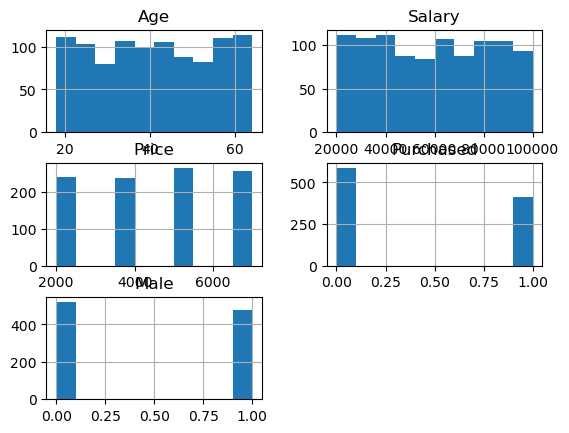

In [31]:
df.hist()

In [39]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Price', 'Purchased', 'Male'], dtype='object')

In [68]:
X = df[['Age', 'Salary', 'Price','Male']]
Y = df['Purchased']

In [32]:
from sklearn.model_selection import train_test_split 

In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler

In [47]:
Scaller = StandardScaler()
x_train = Scaller.fit_transform(x_train)
x_test = Scaller.fit(x_test)

# 2-KNN Classification  

In [51]:
from sklearn.neighbors import KNeighborsClassifier


In [62]:
import math
k = np.sqrt(len(df))


In [63]:
KNN = KNeighborsClassifier(n_neighbors= 31)

In [65]:
KNN.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=31)

In [70]:
Yhat = KNN.predict(x_test)

C:\Users\ayman\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


# 3-evaluation of the model 

In [74]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix

In [73]:
print(f1_score(y_test,Yhat))

0.7654320987654322


In [75]:
print(accuracy_score(y_test,Yhat))

0.81


In [76]:
print(confusion_matrix(y_test,Yhat))

[[100  22]
 [ 16  62]]


In [ ]:
           Predicted Positive    Predicted Negative
Actual Positive        TP                  FN
Actual Negative        FP                  TN

In [77]:
import pickle

In [80]:
with open ('knn_model.pickle','wb') as f:
    pickle.dump(KNN,f)
    

In [81]:
with open ('Scaller.pickle','wb') as f:
    pickle.dump(Scaller,f)

In [82]:
import pandas as pd 
import numpy as np 

In [ ]:
new_df = pd.read_csv('')